In [1]:
# Import all necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

In [2]:
N = 1000
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=N, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

No handles with labels found to put in legend.


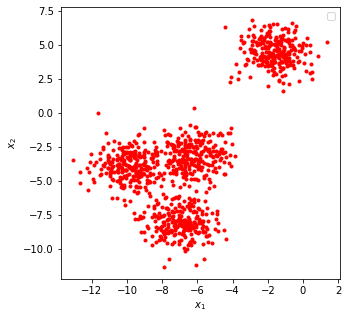

In [3]:
#Figura mostrando os dados de treinamento
fig = plt.figure(figsize=(5,5))
plt.plot(X[:,0],X[:,1], '.r')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()

#Visualmente,imagino que seriam necessários 4 clusters

In [4]:
#Método do Cotovelo

#Função para calcular soma dos quadrados intra-clusters para 19 quantidades de clusters, iniciando com o mínimo de 2 clusters

def calculate_wcss(data):
        wcss = []
        for n in range(2, 21):
            kmeans = KMeans(n_clusters=n)
            kmeans.fit(X=data)
            wcss.append(kmeans.inertia_)
    
        return wcss
    
# Calcula a maior distância entre os pontos que marcam as somas dos quadrados intra-clusters para 19 calculadas com calculate_wcss()
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = np.sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2
    

In [5]:
#Calculando o número ótimo de clusters

sum_of_squares = calculate_wcss(X)
n = optimal_number_of_clusters(sum_of_squares)

print('O número ótimo de clusters é: ',n)

O número ótimo de clusters é:  4


In [6]:
#Instanciando e treinando o modelo
kmeans = KMeans(n_clusters=n)
clusters = kmeans.fit_predict(X)

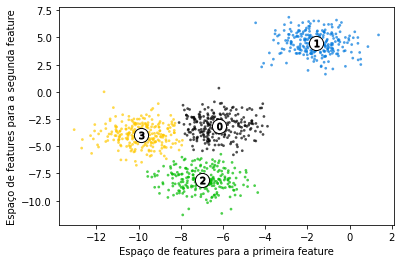

In [7]:
#Figura com os dados de treinamento indicando à que clusters cada um deles pertence além de mostrar os centróides encontrados.

colors = cm.nipy_spectral(clusters.astype(float) / n)
plt.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')
    
plt.xlabel("Espaço de features para a primeira feature")
plt.ylabel("Espaço de features para a segunda feature")

plt.show()

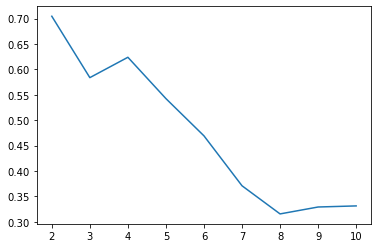

In [8]:
#Método da Silhueta

sil = []
kmax = 10
x1, x2 = 2, kmax
intervalo = range(x1,x2+1)

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters = k).fit(X)
    labels = kmeans.labels_
    sil.append(silhouette_score(X, labels, metric = 'euclidean'))
    
plt.plot(intervalo,sil)
plt.show()

#Analisando o gráfico, percebe-se que o número ótimo de k=2, pois apresenta a maior média de silhueta.

In [9]:
#Instanciando e treinando o modelo
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X)

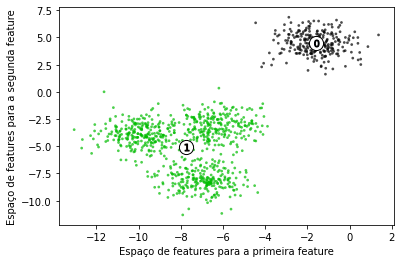

In [10]:
#Figura com os dados de treinamento indicando à que clusters cada um deles pertence além de mostrar os centróides encontrados.

colors = cm.nipy_spectral(clusters.astype(float) / 2)
plt.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
plt.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    plt.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')
    
plt.xlabel("Espaço de features para a primeira feature")
plt.ylabel("Espaço de features para a segunda feature")

plt.show()